In [0]:
# Imports
import cv2
from google.colab.patches import cv2_imshow

In [0]:
# Data Directory
DATA_DIR = '/content/drive/My Drive/capstone_data'

In [0]:
# Sample image
img_path = DATA_DIR + '/Places365_test_00000003.jpg'

In [26]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

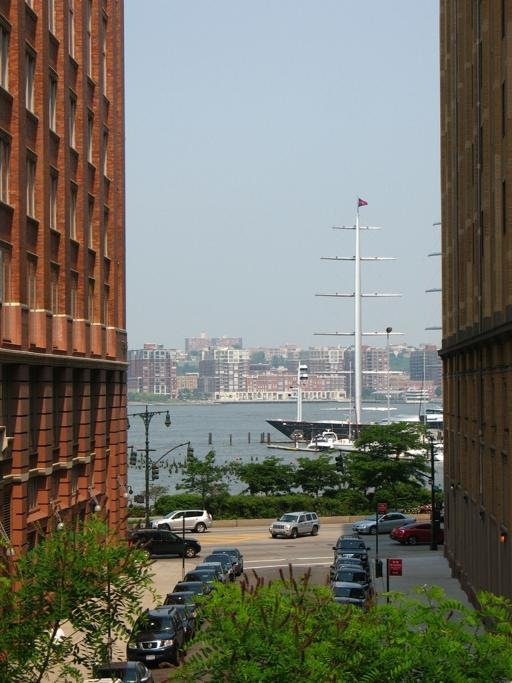

In [27]:
# Originial image
img = cv2.imread(img_path)
cv2_imshow(img)

In [28]:
print(img[0,0]) # BGR values at (0,0)/ top left corner/ 1st-pixel

[30 36 59]


In [29]:
print(img.shape) # dimension (rows, columns, num_channels)

(683, 512, 3)


In [30]:
print(img.size) # height *. width * num_channels

1049088


In [31]:
print(img.dtype)

uint8


In [32]:
# OpenCV uses Numpy data structure to store the images
print(img.astype)

<built-in method astype of numpy.ndarray object at 0x7f7179479bc0>


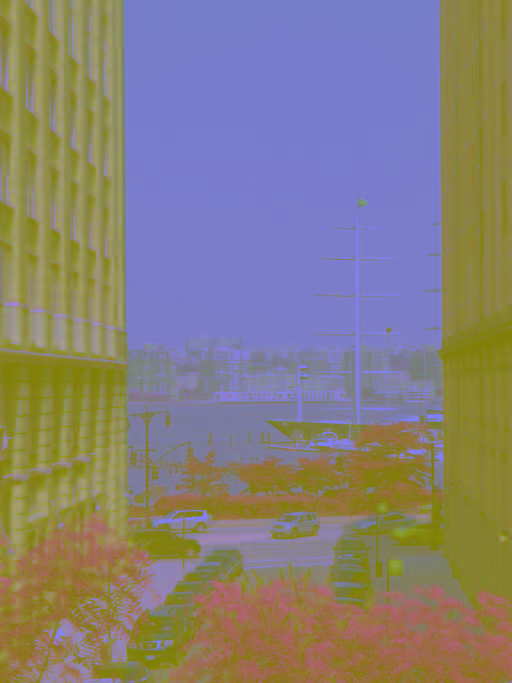

In [33]:
# Convert BGR to LAB color space
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2_imshow(img_lab)

In [34]:
print(img_lab[0,0]) # LAB values at (0,0)/ top left corner/ 1st-pixel

[ 43 137 137]


In [35]:
# Split L, A, B channels
l_channel, a_channel, b_channel = cv2.split(img_lab)

'''
cv2.split() is expensive (time consuming) operation, so alternate is to use Numpy indexing instead

l_channel = img_lab[:, :, 0]
a_channel = img_lab[:, :, 1]
b_channel = img_lab[:, :, 2]
'''

'\ncv2.split() is expensive (time consuming) operation, so alternate is to use Numpy indexing instead\n\nl_channel = img_lab[:, :, 0]\na_channel = img_lab[:, :, 1]\nb_channel = img_lab[:, :, 2]\n'

In [36]:
print(l_channel)

[[ 43  48  47 ...  68  66  71]
 [ 43  48  46 ...  67  64  68]
 [ 45  46  47 ...  67  63  65]
 ...
 [ 19  12  32 ...  72  54  74]
 [ 24  16  35 ...  91 118 140]
 [ 27  19  36 ...  97 170 186]]


In [37]:
print(a_channel)

[[137 136 138 ... 133 135 134]
 [137 137 138 ... 132 134 133]
 [138 139 136 ... 132 134 134]
 ...
 [118 122 118 ... 115 114 114]
 [117 120 117 ... 116 117 115]
 [120 120 118 ... 118 118 117]]


In [38]:
print(b_channel)

[[137 136 135 ... 146 147 148]
 [137 136 135 ... 146 147 148]
 [137 136 137 ... 146 147 148]
 ...
 [139 135 143 ... 148 150 151]
 [142 137 145 ... 145 146 147]
 [143 139 145 ... 144 144 145]]


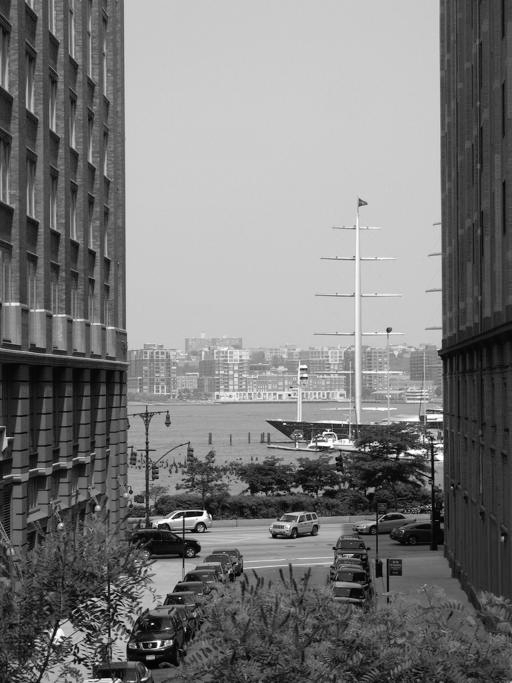

In [39]:
# L channel
cv2_imshow(l_channel)

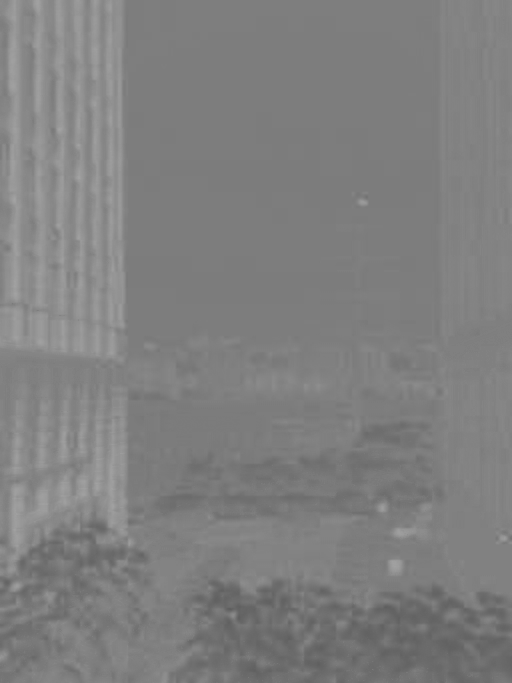

In [40]:
# A channel
cv2_imshow(a_channel)

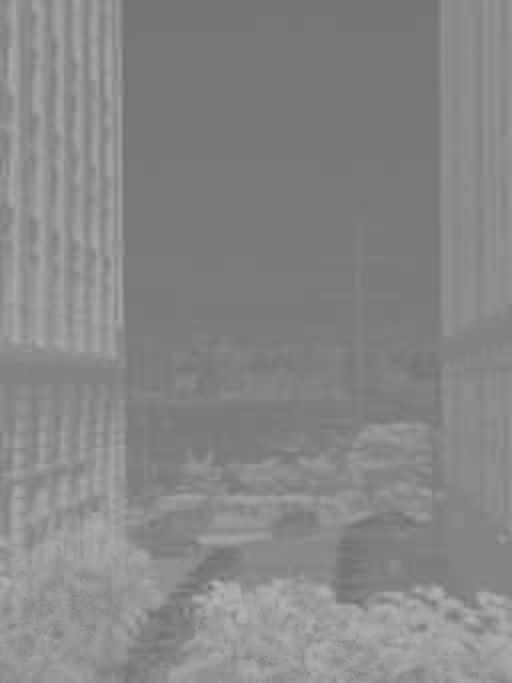

In [41]:
# B channel
cv2_imshow(b_channel)

In [46]:
merged_ab = cv2.merge((a_channel, b_channel))
print(merged_ab)

[[[137 137]
  [136 136]
  [138 135]
  ...
  [133 146]
  [135 147]
  [134 148]]

 [[137 137]
  [137 136]
  [138 135]
  ...
  [132 146]
  [134 147]
  [133 148]]

 [[138 137]
  [139 136]
  [136 137]
  ...
  [132 146]
  [134 147]
  [134 148]]

 ...

 [[118 139]
  [122 135]
  [118 143]
  ...
  [115 148]
  [114 150]
  [114 151]]

 [[117 142]
  [120 137]
  [117 145]
  ...
  [116 145]
  [117 146]
  [115 147]]

 [[120 143]
  [120 139]
  [118 145]
  ...
  [118 144]
  [118 144]
  [117 145]]]


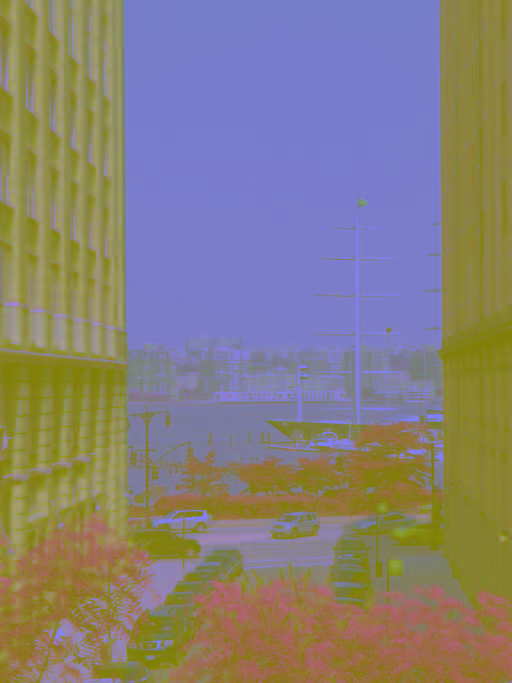

In [47]:
merged_img_l_ab = cv2.merge((l_channel,merged_ab))
cv2_imshow(merged_img_l_ab)

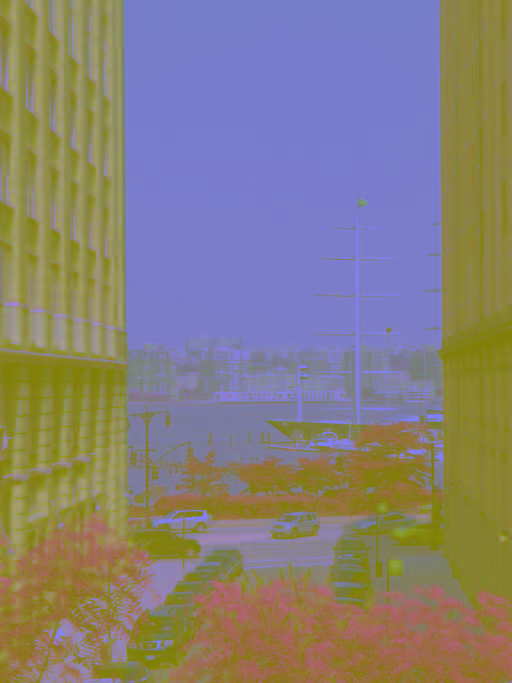

In [0]:
# Merge to LAB image
merged_img = cv2.merge((l_channel,a_channel,b_channel))
cv2_imshow(merged_img)

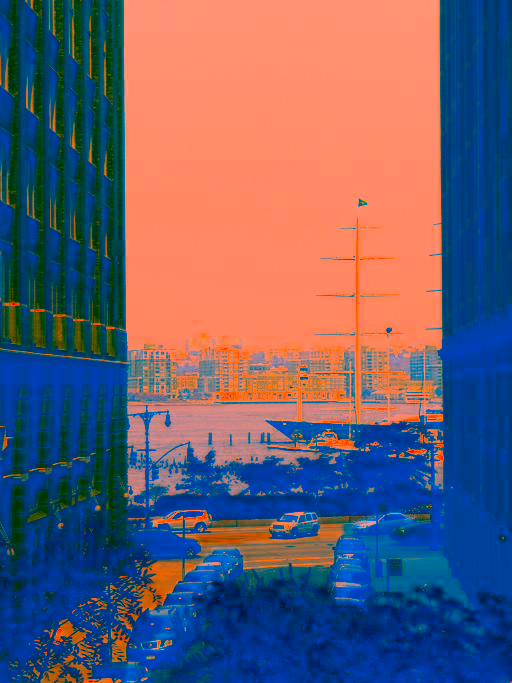

In [0]:
# Convert LAB to BGR color space
img_bgr = cv2.cvtColor(img, cv2.COLOR_LAB2BGR)
cv2_imshow(img_bgr)

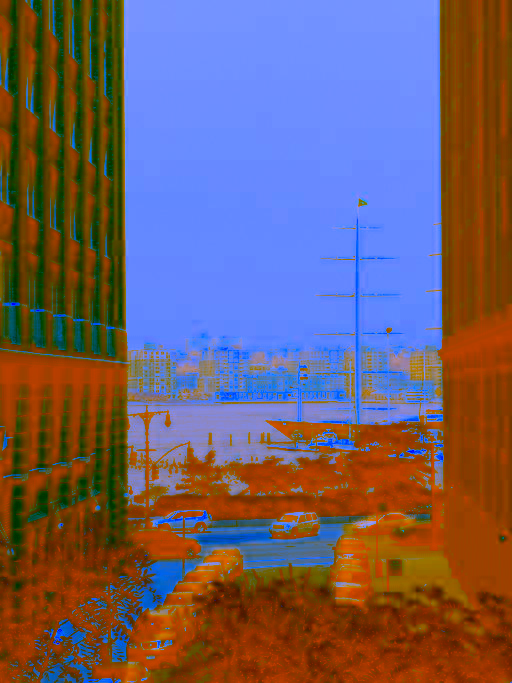

In [0]:
# Convert LAB to RGB color space
img_rgb = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
cv2_imshow(img_rgb)